# Neural Networks image recognition - ConvNet

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.
4. Compare these results with the previous week where we used a MultiLayer Perceptron (this week we use a ConvNet). 

# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend

2023-04-16 13:44:10.507163: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
import matplotlib.pyplot as  plt
%matplotlib inline

## Conv Net
Trains a simple convnet on the MNIST dataset.
Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 [==============================] - 49s 104ms/step - loss: 2.2885 - accuracy: 0.1440 - val_loss: 2.2592 - val_accuracy: 0.3264
Epoch 2/12
469/469 [==============================] - 49s 105ms/step - loss: 2.2407 - accuracy: 0.2569 - val_loss: 2.2015 - val_accuracy: 0.5702
Epoch 3/12
469/469 [==============================] - 49s 104ms/step - loss: 2.1799 - accuracy: 0.3637 - val_loss: 2.1268 - val_accuracy: 0.6406
Epoch 4/12
469/469 [==============================] - 49s 105ms/step - loss: 2.1005 - accuracy: 0.4412 - val_loss: 2.0256 - val_accuracy: 0.6694
Epoch 5/12
469/469 [==============================] - 49s 104ms/step - loss: 1.9931 - accuracy: 0.4965 - val_loss: 1.8867 - val_accuracy: 0.6966
Epoch 6/12
469/469 [==============================] - 51s 108ms/step - loss: 1.8498 - accuracy: 0.5449 - val_loss: 1.7087 - val_accuracy: 0.7202
Epoch 7/12
469/469 [==============================] - 49s 104ms/step - loss: 1.6871 - accuracy: 0.5766 - val_loss: 1.5036 - val_ac

In [4]:
import numpy as np

#Use .1, .5, 1.0, 2.0, 4.0

x_train_noise10 = x_train + np.random.normal(0, 255*.10, x_train.shape)
x_test_noise10 = x_test + np.random.normal(0, 255*.10, x_test.shape)

x_train_noise50 = x_train + np.random.normal(0, 255*.50, x_train.shape)
x_test_noise50 = x_test + np.random.normal(0, 255*.50, x_test.shape)

x_train_noise1 = x_train + np.random.normal(0, 255*1, x_train.shape)
x_test_noise1 = x_test + np.random.normal(0, 255*1, x_test.shape)

x_train_noise2 = x_train + np.random.normal(0, 255*2, x_train.shape)
x_test_noise2 = x_test + np.random.normal(0, 255*2, x_test.shape)

x_train_noise4 = x_train + np.random.normal(0, 255*4, x_train.shape)
x_test_noise4 = x_test + np.random.normal(0, 255*4, x_test.shape)

In [5]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train_noise10, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_noise10, y_test))
score_cn10 = model.evaluate(x_test_noise10, y_test, verbose=0)
print('Test loss:', score_cn10[0])
print('Test accuracy:', score_cn10[1])

Epoch 1/12
469/469 [==============================] - 51s 107ms/step - loss: 8.1077 - accuracy: 0.1035 - val_loss: 2.5031 - val_accuracy: 0.1005
Epoch 2/12
469/469 [==============================] - 49s 105ms/step - loss: 2.9662 - accuracy: 0.0992 - val_loss: 2.3037 - val_accuracy: 0.0955
Epoch 3/12
469/469 [==============================] - 49s 104ms/step - loss: 2.4012 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.0972
Epoch 4/12
469/469 [==============================] - 48s 102ms/step - loss: 2.3395 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.0974
Epoch 5/12
469/469 [==============================] - 48s 103ms/step - loss: 2.3217 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.0972
Epoch 6/12
469/469 [==============================] - 50s 107ms/step - loss: 2.3169 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.0972
Epoch 7/12
469/469 [==============================] - 49s 103ms/step - loss: 2.3122 - accuracy: 0.1073 - val_loss: 2.3026 - val_ac

In [6]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train_noise50, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_noise50, y_test))
score_cn50 = model.evaluate(x_test_noise50, y_test, verbose=0)
print('Test loss:', score_cn50[0])
print('Test accuracy:', score_cn50[1])

Epoch 1/12
469/469 [==============================] - 50s 105ms/step - loss: 33.9229 - accuracy: 0.0996 - val_loss: 5.0691 - val_accuracy: 0.0987
Epoch 2/12
469/469 [==============================] - 49s 104ms/step - loss: 7.5355 - accuracy: 0.1017 - val_loss: 2.3117 - val_accuracy: 0.1132
Epoch 3/12
469/469 [==============================] - 48s 101ms/step - loss: 2.9161 - accuracy: 0.1076 - val_loss: 2.3030 - val_accuracy: 0.1130
Epoch 4/12
469/469 [==============================] - 50s 106ms/step - loss: 2.4958 - accuracy: 0.1098 - val_loss: 2.3027 - val_accuracy: 0.1135
Epoch 5/12
469/469 [==============================] - 47s 101ms/step - loss: 2.4007 - accuracy: 0.1106 - val_loss: 2.3026 - val_accuracy: 0.1135
Epoch 6/12
469/469 [==============================] - 47s 100ms/step - loss: 2.3654 - accuracy: 0.1122 - val_loss: 2.3026 - val_accuracy: 0.1135
Epoch 7/12
469/469 [==============================] - 48s 103ms/step - loss: 2.3505 - accuracy: 0.1113 - val_loss: 2.3026 - val_a

In [7]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train_noise1, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_noise1, y_test))
score_cn1 = model.evaluate(x_test_noise1, y_test, verbose=0)
print('Test loss:', score_cn1[0])
print('Test accuracy:', score_cn1[1])

Epoch 1/12
469/469 [==============================] - 49s 104ms/step - loss: 66.7454 - accuracy: 0.1012 - val_loss: 7.8296 - val_accuracy: 0.1026
Epoch 2/12
469/469 [==============================] - 54s 116ms/step - loss: 12.6091 - accuracy: 0.0983 - val_loss: 2.3154 - val_accuracy: 0.0979
Epoch 3/12
469/469 [==============================] - 50s 107ms/step - loss: 3.5323 - accuracy: 0.1000 - val_loss: 2.3033 - val_accuracy: 0.0982
Epoch 4/12
469/469 [==============================] - 49s 105ms/step - loss: 2.7072 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.0981
Epoch 5/12
469/469 [==============================] - 50s 106ms/step - loss: 2.5153 - accuracy: 0.1100 - val_loss: 2.3026 - val_accuracy: 0.1135
Epoch 6/12
469/469 [==============================] - 51s 108ms/step - loss: 2.4454 - accuracy: 0.1116 - val_loss: 2.3025 - val_accuracy: 0.1135
Epoch 7/12
469/469 [==============================] - 50s 106ms/step - loss: 2.3941 - accuracy: 0.1120 - val_loss: 2.3025 - val_

In [8]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train_noise2, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_noise2, y_test))
score_cn2 = model.evaluate(x_test_noise2, y_test, verbose=0)
print('Test loss:', score_cn2[0])
print('Test accuracy:', score_cn2[1])

Epoch 1/12
469/469 [==============================] - 57s 121ms/step - loss: 139.7692 - accuracy: 0.0992 - val_loss: 21.7722 - val_accuracy: 0.1029
Epoch 2/12
469/469 [==============================] - 51s 108ms/step - loss: 29.4011 - accuracy: 0.0983 - val_loss: 2.4419 - val_accuracy: 0.0996
Epoch 3/12
469/469 [==============================] - 50s 106ms/step - loss: 5.7966 - accuracy: 0.1025 - val_loss: 2.3050 - val_accuracy: 0.1010
Epoch 4/12
469/469 [==============================] - 50s 107ms/step - loss: 3.3580 - accuracy: 0.1018 - val_loss: 2.3028 - val_accuracy: 0.1010
Epoch 5/12
469/469 [==============================] - 49s 105ms/step - loss: 2.8401 - accuracy: 0.1027 - val_loss: 2.3026 - val_accuracy: 0.1010
Epoch 6/12
469/469 [==============================] - 51s 108ms/step - loss: 2.6126 - accuracy: 0.1022 - val_loss: 2.3026 - val_accuracy: 0.1010
Epoch 7/12
469/469 [==============================] - 52s 112ms/step - loss: 2.5325 - accuracy: 0.1087 - val_loss: 2.3025 - va

In [9]:
batch_size = 128
num_classes = 10
epochs = 12

# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train_noise4, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_noise4, y_test))
score_cn4 = model.evaluate(x_test_noise4, y_test, verbose=0)
print('Test loss:', score_cn4[0])
print('Test accuracy:', score_cn4[1])

Epoch 1/12
469/469 [==============================] - 52s 110ms/step - loss: 274.1149 - accuracy: 0.1022 - val_loss: 33.0794 - val_accuracy: 0.0964
Epoch 2/12
469/469 [==============================] - 48s 103ms/step - loss: 48.8600 - accuracy: 0.0998 - val_loss: 2.3936 - val_accuracy: 0.0899
Epoch 3/12
469/469 [==============================] - 49s 105ms/step - loss: 7.8283 - accuracy: 0.1028 - val_loss: 2.3037 - val_accuracy: 0.1031
Epoch 4/12
469/469 [==============================] - 51s 110ms/step - loss: 4.0036 - accuracy: 0.1034 - val_loss: 2.3027 - val_accuracy: 0.1028
Epoch 5/12
469/469 [==============================] - 55s 116ms/step - loss: 3.1702 - accuracy: 0.1049 - val_loss: 2.3026 - val_accuracy: 0.1028
Epoch 6/12
469/469 [==============================] - 50s 108ms/step - loss: 2.8708 - accuracy: 0.1042 - val_loss: 2.3026 - val_accuracy: 0.1028
Epoch 7/12
469/469 [==============================] - 51s 109ms/step - loss: 2.7141 - accuracy: 0.1044 - val_loss: 2.3026 - va

## Visualization of Loss

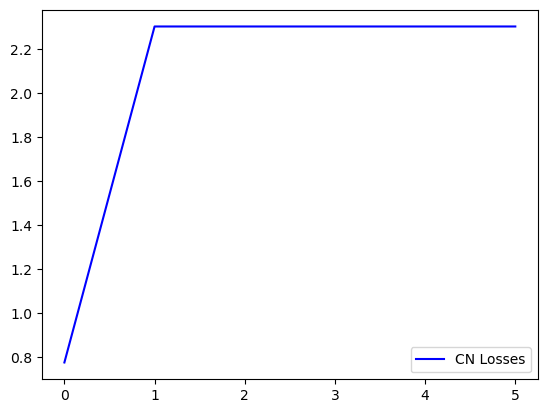

In [13]:
cn_losses = np.array([score[0], score_cn10[0], score_cn50[0], score_cn1[0], score_cn2[0], score_cn4[0]])
plt.plot(cn_losses, label='CN Losses', color='b')
plt.legend()

In [14]:
cn_losses

array([0.77717024, 2.3025353 , 2.30251789, 2.30252743, 2.30251932,
       2.30254698])

## Visualization of Accuracy

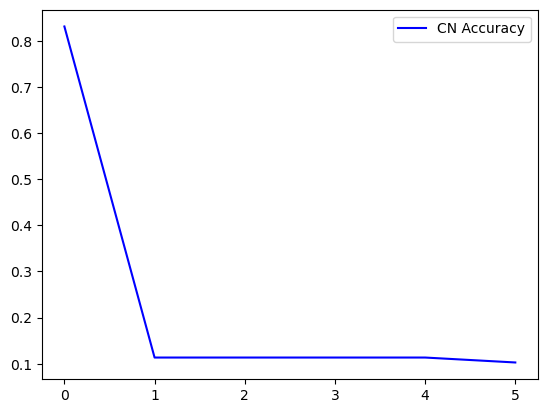

In [15]:
cn_accur = np.array([score[1], score_cn10[1], score_cn50[1], score_cn1[1], score_cn2[1], score_cn4[1]])
plt.plot(cn_accur, label='CN Accuracy', color='b')
plt.legend()

In [16]:
cn_accur

array([0.83090001, 0.1135    , 0.1135    , 0.1135    , 0.1135    ,
       0.1028    ])

### As seen in the visualizations of both loss and accuracy above (and in the previous assignment), adding noise (.10 to .50 to 1 to 2 to 4) greatly increases loss and decreases accuracy- even at a low level. It is interesting though that once noise wrecks the result, adding more noise does not further degrade accuracy or increase loss. 